In [1]:
from sdot import optimal_transport_plan, SumOfDiracs, UnitBox
import numpy as np
np.random.seed( 357 )

pl = optimal_transport_plan(
    SumOfDiracs( np.random.random( [ 40, 2 ] ) ),
    UnitBox()
)
# pd.plot()

AttributeError: ConstantValue

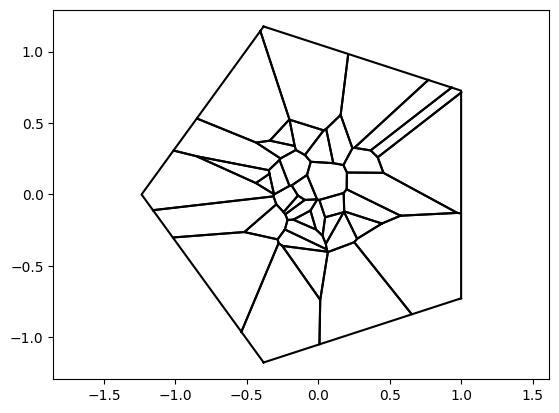

In [6]:
import matplotlib.pyplot as plt
from sdot import PowerDiagram
import numpy as np

# we center the points around 0 for this example
pd = PowerDiagram( np.random.random( [ 40, 2 ] ) - 0.5 )

# Here we use a setter to set a value after the call of the constructor (we can do the same thing for positions, weights, ...)
# In this example we add 5 affine functions defined by the directions [ np.cos( a ), np.sin( a ) ] and offsets equal to 1
# A point x is exterior when `dot( direction, x ) - offset > 0` 
pd.boundaries = [ [ np.cos( a ), np.sin( a ), 1 ] for a in np.linspace( 0, 2 * np.pi, 5, endpoint=False ) ]

pd.plot_in_pyplot( plt )
plt.show()


In [7]:
np.eye( 2 )

array([[1., 0.],
       [0., 1.]])

In [1]:
import matplotlib.pyplot as plt
from sdot import Cell

cell = Cell( ndim = 3 )

# we create a triangle, infinitely extruded
cell.cut( [ -1,  0, 0 ], 0 )
cell.cut( [  0, -1, 0 ], 0 )
cell.cut( [ +1, +1, 0 ], 1 )

# naturally, there's no 3D vertex...
print( cell.nb_vertices ) # => 0

# and this cell is sill unbounded (in 3D)
print( cell.bounded ) # => False

# It's because we're in 2D
print( cell.true_dimensionality ) # => 2

# "td" is the shortcut for "true dimensionality".
# Method with with prefix return the information for the subspace defined by `cell.base`
print( cell.nb_vertices_td ) # => 3 (the 3 vertices of the triangle)

# we can get coordinates to represent these points in 3D
print( cell.vertex_coords_td @ cell.base ) # => [[0. 0. 0.] [1. 0. 0.] [0. 1. 0.]]

cell.plot( plt )
plt.show()

sdot_bindings_for_3_FP64_Linux_skylake_avx512 dict_keys([])
0
False
2
3
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


AttributeError: 'sdot_bindings_for_3_FP64_Linux_skylake_avx512.Cell_3_FP64_Linux_skylake_avx512' object has no attribute 'for_each_face'

In [1]:
import matplotlib.pyplot as plt
from sdot import PowerDiagram
import numpy as np

pd = PowerDiagram( positions = np.random.random( [ 30, 2 ] ) )

pd.periodicity_transformations = [
    ( np.eye( 2 ), [ 0, 1 ] )
]
print( np.ptp( pd.summary().vertex_coords[ :, 0 ] ) )
pd.plot()


[]


TypeError: list indices must be integers or slices, not tuple